In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


# Any results you write to the current directory are saved as output.

sd_traffic = pd.read_csv("../Hackathon Datasets/Traffic/sd_traffic_2015_locations.csv")

In this notebook we will be exploring the US Traffic 2015 dataset for San Diego. The dataset was taken from the US department of Transportation.

In [3]:
print(sd_traffic.shape)


(24182, 41)


Description of data. Below will have additional inofmration regarding the type of data to better describe the graphs. Some information could not be found which will be highlighted in italics

San Diego Traffic dataset (191057x39 dataframe)
    * date
    * day_of_data
    * day_of_week
    * fips_state_code: Federal Information Processing Standards. 06 assigned to California
    * <i>lane_of_travel</i>
    * month_of_data
    * <i>record_type</i>
    * restrictions: All data is NaN
    * <i>station_id</i>
    * traffic_volume_counted_after_.... - Traffic volume by bins 
    * year_of_data: Year the data was taken 
    * Direction of Travel:
        1 - North
        3- East
        5 - South
        7 - West
    * Functional Classification: Symbol
    * Functional Classification Name: Type of road (urban: principal arterial - interstate)
    * Latitude
    * Longitude

San Diego Traffic Station dataset (52x56 dataframe)
    * algorithm_of_vehicle_classification: All values are NaN
    * algorithm_of_vehicle_classification_name: All values are NaN
    * calibration_of_weighing_system
    * calibration_of_weighing_system_name
    * classification_system_for_vehicle_classification
    * concurrent_route_signing
    * concurrent_signed_route_number
    * concurrent_signed_route_number
    * direction_of_travel_name
    * fips_county_code
    * fips_state_code
    * functional_classification
    * functional_classification_name
    * hpms_sample_identifies: Values are NaN
    * hpms_sample_type: Values are NaN
    * lane_of_travel: 0, 1, 2, 3, 4, 5, 7
    * lane_of_travel_name:
        * 0 - data with lanes combined
        * 1 - Outside (rightmost) lane
        * 2 - Other lanes
        * 3 - Other lanes
        * 4 - Other lanes
        * 5 - Other lanes
        * 7 - Other lanes
    * latitude
    * longitude 
    * lrs_identification
    * lrs_location_point
    * method_of_data_retrieval
    * method_of_data_retrieval_name
    * method_of_traffic_volume_counting
    * method_of_traffic_volume_counting_name
    * method_of_truck_weighing 
    * method_of_truck_weighing_name
    * method_of_vehicle_classification 
    * method_of_vehicle_classification_name
    * national_highway_system 
    * number_of_lanes_in_direction_indicated 
    * number_of_lanes_monitored_for_traffic_volume 
    * number_of_lanes_monitored_for_truck_weight 
    * number_of_lanes_monitored_for_vehicle_class
    * posted_route_signing 
    * posted_signed_route_number
    * previous_station_idprimary_purpose 
    * primary_purpose_namerecord_type
    * sample_type_for_traffic_volume 
    * sample_type_for_traffic_volume_name
    * sample_type_for_truck_weight 
    * sample_type_for_truck_weight_name 
    * sample_type_for_vehicle_classification 
    * sample_type_for_vehicle_classification_name
    * second_type_of_sensor 
    * shrp_site_identificationstation_id
    * station_location 
    * type_of_sensortype_of_sensor_name
    * year_of_data 
    * year_station_discontinued
    * year_station_established
  
We will drop the following columns from the sdt dataset, as of right now we only care about traffic density and not direction of traffic. After this sdt will have 33 columns
    * fips_state_code, lane_of_travel, record_type, restrictions, functional_classification,
    functional_classification_name




In [4]:
sd_traffic_drop_columns = ["fips_state_code","lane_of_travel","record_type","restrictions", \
                   "functional_classification","functional_classification_name"]
sd_traffic_ds = sd_traffic.drop(sd_traffic_drop_columns, axis=1)
sd_traffic_ds.shape

(24182, 35)

We can now begin to look at the data to find different type of traffic patterns.

We have three station ids in the data set which correspond to three separate locations
    119030 (intersection of 5 and 15) -> 32.692872  117.121745 (8304 rows)
    119100 (crossover of 15 and 805 near parque linda) -> 32.732428  117.111704 (8688 rows)
    119740 (94 near Golden Hill) -> 32.713208  117.133743 (7190 rows)

Normally the longitude for San Diego would be a negative value, the data was recorded just with numbers and no negative values 
    

In [5]:

station_ids = sd_traffic_ds["station_id"].unique()
for i in station_ids:
    print("Station_id",i)
    print(sd_traffic_ds[sd_traffic_ds["station_id"] == i][["latitude","longitude"]].head(1))

    

Station_id 119030
    latitude   longitude
0  32.692872  117.121745
Station_id 119100
       latitude   longitude
8304  32.732428  117.111704
Station_id 119740
        latitude   longitude
16992  32.713208  117.133743


Let's break down each location to see when we see the most traffic.

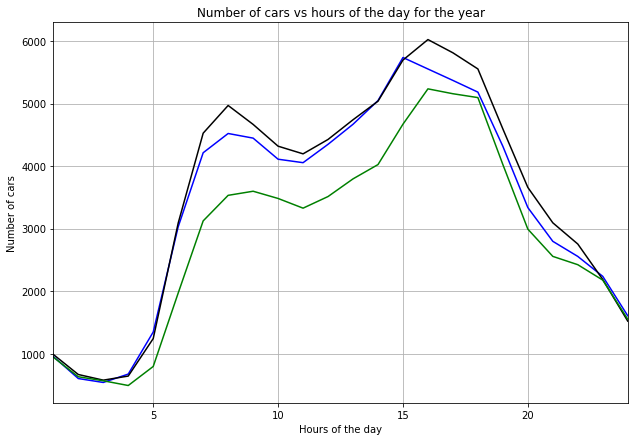

In [6]:

#Breaking up the traffic by station
sdtds_id_0 = sd_traffic_ds[sd_traffic_ds["station_id"] == station_ids[0]]
sdtds_id_1 = sd_traffic_ds[sd_traffic_ds["station_id"] == station_ids[1]]
sdtds_id_2 = sd_traffic_ds[sd_traffic_ds["station_id"] == station_ids[2]]

sdtds_id_0_mean = np.mean(sdtds_id_0.loc[:,"traffic_volume_counted_after_0000_to_0100": \
               "traffic_volume_counted_after_2300_to_2400"])
sdtds_id_1_mean = np.mean(sdtds_id_1.loc[:,"traffic_volume_counted_after_0000_to_0100": \
               "traffic_volume_counted_after_2300_to_2400"])
sdtds_id_2_mean = np.mean(sdtds_id_2.loc[:,"traffic_volume_counted_after_0000_to_0100": \
               "traffic_volume_counted_after_2300_to_2400"])
sdtds_id_0_std = np.std(sdtds_id_0.loc[:,"traffic_volume_counted_after_0000_to_0100": \
               "traffic_volume_counted_after_2300_to_2400"])
sdtds_id_1_std = np.std(sdtds_id_1.loc[:,"traffic_volume_counted_after_0000_to_0100": \
               "traffic_volume_counted_after_2300_to_2400"])
sdtds_id_2_std = np.std(sdtds_id_2.loc[:,"traffic_volume_counted_after_0000_to_0100": \
               "traffic_volume_counted_after_2300_to_2400"])


#Plotting the most traffic by station 
fig = plt.figure(1, figsize=(35, 7))
ax = fig.gca()
ax.set_xticks(np.arange(0, 25, 1))
#ax.set_yticks(numpy.arange(0, 1., 1))
plt.subplot(131)
plt.title("Number of cars vs hours of the day for the year")
plt.xlabel("Hours of the day")
plt.ylabel("Number of cars")
plt.xlim((1,24))
plt.plot(range(1,25,1),sdtds_id_0_mean[0:],color = "blue")
plt.plot(range(1,25,1),sdtds_id_1_mean[0:],color = "black")
plt.plot(range(1,25,1),sdtds_id_2_mean[0:],color = "green")
plt.grid()


The above graph looks at a summation of the total amount of traffic through out the year. It appears that every station tends to see it's lowest amount of traffic between 12:00am and 3:00am. 

Around 3:00am the traffic increases until 10pm and then fluctuates. Traffic gradually increases again around 5pm and then begins to slowly decrease. The averages look good but since we are looking at data throughout the year we see a lot of variability which makes sense.


In [7]:
frames = [sdtds_id_0_std, sdtds_id_1_std, sdtds_id_2_std]
sdtds_std = pd.concat(frames,axis=1, sort=False)
sdtds_std.columns=['Station 0','Station 1', 'Station 2']
sdtds_std

,Station 0,Station 1,Station 2
traffic_volume_counted_after_0000_to_0100,456.365928,282.089927,503.689155
traffic_volume_counted_after_0100_to_0200,279.352056,239.455424,378.056169
traffic_volume_counted_after_0200_to_0300,214.178022,168.511977,387.622768
traffic_volume_counted_after_0300_to_0400,352.376123,160.083869,175.171689
traffic_volume_counted_after_0400_to_0500,1106.807656,540.604561,468.033111
traffic_volume_counted_after_0500_to_0600,2548.377563,1553.916068,1528.392721
traffic_volume_counted_after_0600_to_0700,2980.175140,2116.371062,2288.549517
traffic_volume_counted_after_0700_to_0800,2301.542481,1875.925847,1937.444587
traffic_volume_counted_after_0800_to_0900,2040.042340,1384.092645,1590.801628
traffic_volume_counted_after_0900_to_1000,1276.022096,795.586197,1153.519789


For the purposes of this notebook we only care about the times that street lighst are active. We will remove the columns from 7am - 5pm (around the times we will see sunrise and sunset throughout the year. 

We will also start breaking up the data by month to view the different types of traffic throughout the year. 

13
Standard Deviation throughout the year


traffic_volume_counted_after_1700_to_1800    1483.120664
traffic_volume_counted_after_1800_to_1900    1000.633828
traffic_volume_counted_after_1900_to_2000     581.779116
traffic_volume_counted_after_2000_to_2100     469.397155
traffic_volume_counted_after_2100_to_2200     513.826797
traffic_volume_counted_after_2200_to_2300     522.049881
traffic_volume_counted_after_2300_to_2400     450.286614
dtype: float64

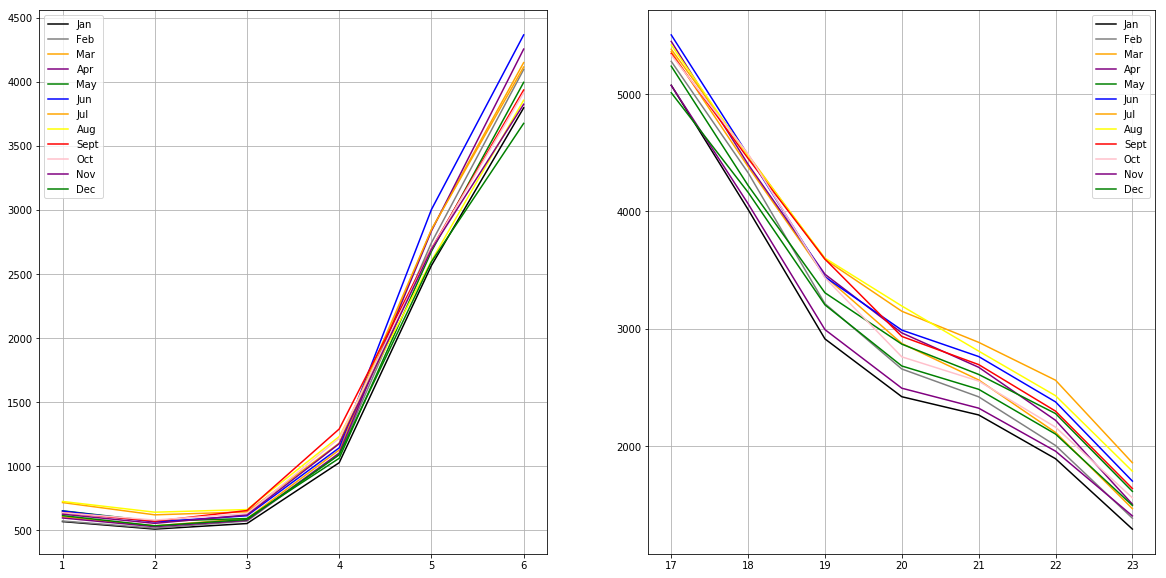

In [87]:
sun_outside_drop = ['traffic_volume_counted_after_0700_to_0800', \
                    'traffic_volume_counted_after_0800_to_0900', \
                    'traffic_volume_counted_after_0900_to_1000', \
                    'traffic_volume_counted_after_1000_to_1100', \
                    'traffic_volume_counted_after_1100_to_1200', \
                    'traffic_volume_counted_after_1200_to_1300', \
                    'traffic_volume_counted_after_1300_to_1400', \
                    'traffic_volume_counted_after_1400_to_1500', \
                    'traffic_volume_counted_after_1500_to_1600', \
                    'traffic_volume_counted_after_1600_to_1700']
sd_traffic_nt = sd_traffic_ds.drop(sun_outside_drop,axis=1) #Nighttime dataset

#Filtering data by month
sd_traffic_nt_01 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 1]
sd_traffic_nt_02 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 2]
sd_traffic_nt_03 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 3]
sd_traffic_nt_04 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 4]
sd_traffic_nt_05 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 5]
sd_traffic_nt_06 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 6]
sd_traffic_nt_07 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 7]
sd_traffic_nt_08 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 8]
sd_traffic_nt_09 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 9]
sd_traffic_nt_10 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 10]
sd_traffic_nt_11 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 11]
sd_traffic_nt_12 = sd_traffic_nt[sd_traffic_nt["month_of_data"] == 12]

#x-axis
x_am = [1,2,3,4,5,6]
x_pm = [17,18,19,20,21,22,23]
print(len(x))
#Mean of traffic throughout the month broken up by am and pm
sd_nt_mean_01_am = np.mean(sd_traffic_nt_01.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_02_am = np.mean(sd_traffic_nt_02.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_03_am = np.mean(sd_traffic_nt_03.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_04_am = np.mean(sd_traffic_nt_04.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_05_am = np.mean(sd_traffic_nt_05.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_06_am = np.mean(sd_traffic_nt_06.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_07_am = np.mean(sd_traffic_nt_07.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_08_am = np.mean(sd_traffic_nt_08.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_09_am = np.mean(sd_traffic_nt_09.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_10_am = np.mean(sd_traffic_nt_10.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_11_am = np.mean(sd_traffic_nt_11.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])
sd_nt_mean_12_am = np.mean(sd_traffic_nt_12.loc[:,"traffic_volume_counted_after_0100_to_0200":\
                     "traffic_volume_counted_after_0600_to_0700"])

sd_nt_mean_01_pm = np.mean(sd_traffic_nt_01.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_02_pm = np.mean(sd_traffic_nt_02.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_03_pm = np.mean(sd_traffic_nt_03.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_04_pm = np.mean(sd_traffic_nt_04.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_05_pm = np.mean(sd_traffic_nt_05.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_06_pm = np.mean(sd_traffic_nt_06.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_07_pm = np.mean(sd_traffic_nt_07.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_08_pm = np.mean(sd_traffic_nt_08.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_09_pm = np.mean(sd_traffic_nt_09.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_10_pm = np.mean(sd_traffic_nt_10.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_11_pm = np.mean(sd_traffic_nt_11.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])
sd_nt_mean_12_pm = np.mean(sd_traffic_nt_12.loc[:,"traffic_volume_counted_after_1700_to_1800":\
                     "traffic_volume_counted_after_2300_to_2400"])

# #Plotting data by month
plt.figure(2,figsize=(20, 10))
#ax = fig.gca()
plt.title("Number of cars vs hours of the day per month")
plt.xlabel("Hours of the day")
plt.ylabel("Number of cars")
plt.subplot(121)
plt.plot(x_am,sd_nt_mean_01_am[0:],color='black',label='Jan')
plt.plot(x_am,sd_nt_mean_02_am[0:],color='grey',label='Feb')
plt.plot(x_am,sd_nt_mean_03_am[0:],color='orange',label='Mar')
plt.plot(x_am,sd_nt_mean_04_am[0:],color='purple',label='Apr')
plt.plot(x_am,sd_nt_mean_05_am[0:],color='green',label='May')
plt.plot(x_am,sd_nt_mean_06_am[0:],color='blue',label='Jun')
plt.plot(x_am,sd_nt_mean_07_am[0:],color='orange',label='Jul')
plt.plot(x_am,sd_nt_mean_08_am[0:],color='yellow',label='Aug')
plt.plot(x_am,sd_nt_mean_09_am[0:],color='red',label='Sept')
plt.plot(x_am,sd_nt_mean_10_am[0:],color='pink',label='Oct')
plt.plot(x_am,sd_nt_mean_11_am[0:],color='purple',label='Nov')
plt.plot(x_am,sd_nt_mean_12_am[0:],color='green',label='Dec')
plt.xticks(x_am)
plt.legend()
plt.grid()
plt.subplot(122)
plt.plot(x_pm,sd_nt_mean_01_pm[0:],color='black',label='Jan')
plt.plot(x_pm,sd_nt_mean_02_pm[0:],color='grey',label='Feb')
plt.plot(x_pm,sd_nt_mean_03_pm[0:],color='orange',label='Mar')
plt.plot(x_pm,sd_nt_mean_04_pm[0:],color='purple',label='Apr')
plt.plot(x_pm,sd_nt_mean_05_pm[0:],color='green',label='May')
plt.plot(x_pm,sd_nt_mean_06_pm[0:],color='blue',label='Jun')
plt.plot(x_pm,sd_nt_mean_07_pm[0:],color='orange',label='Jul')
plt.plot(x_pm,sd_nt_mean_08_pm[0:],color='yellow',label='Aug')
plt.plot(x_pm,sd_nt_mean_09_pm[0:],color='red',label='Sept')
plt.plot(x_pm,sd_nt_mean_10_pm[0:],color='pink',label='Oct')
plt.plot(x_pm,sd_nt_mean_11_pm[0:],color='purple',label='Nov')
plt.plot(x_pm,sd_nt_mean_12_pm[0:],color='green',label='Dec')
plt.xticks(x_pm)
plt.legend()
plt.grid()

frames2 = [sd_nt_std_01, sd_nt_std_02, sd_nt_std_03, sd_nt_std_04, sd_nt_std_05, sd_nt_std_06,\
          sd_nt_std_07, sd_nt_std_08, sd_nt_std_09, sd_nt_std_10, sd_nt_std_11, sd_nt_std_12]
sd_nt_std_year = pd.concat(frames2,axis=1, sort=False)
sd_nt_std_year.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
print("Standard Deviation throughout the year")
sd_nt_std_year
sd_nt_std_01

From the graphs we see that generally throughout each month the data follows the same trend.  Around 3am we see an uptick in traffic and then around 5pm, where traffic is at it's highest. We are still seeing a lot of variability with the data so let's filter per station. 